In [137]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [138]:
# load data for sensor value fault
with open("log_exp_svf1.pkl", "rb") as f:
    data = pickle.load(f)



In [139]:
print(len(data[0]), len(data[1]), len(data[2]), len(data[3]))

0 107 0 66


In [140]:
data_format = ('payload', 'board_id', 'pkt_no', 'RSSI', 'Tx_time', 'reTx_time', 'rx_time' )

In [141]:
### Number of Packets received by primary board and redundant board
print('Primary Board:', len(data[1]))
print('Redundant Board:', len(data[3]))


Primary Board: 107
Redundant Board: 66


In [142]:
### check if all packets belong to same board
### PB
pb_id = 0
rb_id = 0
for d_i, d in enumerate(data[1]):
    if d_i == 0:
        pb_id = d[1]
        print('PB Id:',pb_id) 
    assert(data[1][0][1]==d[1])
### RB
for d_i, d in enumerate(data[3]):
    if d_i == 0:
        rb_id = d[1]
        print('RB Id:', rb_id)
    assert(data[3][0][1]==d[1])

PB Id: 94420780
RB Id: 3903892222


In [143]:
### calculating the Packet Reception Ratio (only PB)
packet_num = []
num_pkts_sent = 0 
num_pkts_rx = 0
prr_pb = 0
for d in data[1]:
    packet_num += [d[2]]
    num_pkts_sent = max(packet_num)
    num_pkts_rx = len(packet_num)
#prr_pb = (num_pkts_rx/num_pkts_sent) * 100
#print('PRR of PB:', prr_pb)

PRR of PB: 94.69026548672566


In [47]:
### analyze PB data
for d in data[1]:
    print(d[1:])
    #print(d[0][0])
    
    

(94420780, 0, -97, 25, 25, [2023, 3, 6, 10, 4, 55])
(94420780, 1, -97, 48, 48, [2023, 3, 6, 10, 5, 19])
(94420780, 2, -96, 72, 72, [2023, 3, 6, 10, 5, 42])
(94420780, 3, -100, 102, 102, [2023, 3, 6, 10, 6, 12])
(94420780, 4, -45, 132, 132, [2023, 3, 6, 10, 6, 42])
(94420780, 5, -96, 162, 162, [2023, 3, 6, 10, 7, 12])
(94420780, 6, -46, 186, 186, [2023, 3, 6, 10, 7, 36])
(94420780, 7, -95, 209, 209, [2023, 3, 6, 10, 7, 59])
(94420780, 8, -94, 233, 233, [2023, 3, 6, 10, 8, 23])
(94420780, 9, -96, 263, 263, [2023, 3, 6, 10, 8, 53])
(94420780, 10, -94, 293, 293, [2023, 3, 6, 10, 9, 24])
(94420780, 12, -102, 354, 354, [2023, 3, 6, 10, 10, 24])
(94420780, 13, -95, 381, 381, [2023, 3, 6, 10, 10, 51])
(94420780, 14, -97, 404, 404, [2023, 3, 6, 10, 11, 15])
(94420780, 15, -98, 428, 428, [2023, 3, 6, 10, 11, 38])
(94420780, 16, -96, 451, 451, [2023, 3, 6, 10, 12, 2])
(94420780, 17, -94, 475, 475, [2023, 3, 6, 10, 12, 25])
(94420780, 19, -94, 522, 522, [2023, 3, 6, 10, 13, 12])
(94420780, 20, -95

In [48]:
### analyze RB data
for d in data[3]:
    print(d[1:])
    #print(d[0][0])

(3903892222, 0, -47, 62, 62, [2023, 3, 6, 10, 5, 32])
(3903892222, 0, -104, 122, 122, [2023, 3, 6, 10, 6, 32])
(3903892222, 0, -97, 182, 182, [2023, 3, 6, 10, 7, 32])
(3903892222, 0, -98, 242, 242, [2023, 3, 6, 10, 8, 32])
(3903892222, 0, -94, 302, 302, [2023, 3, 6, 10, 9, 32])
(3903892222, 11, -97, 337, 337, [2023, 3, 6, 10, 10, 10])
(3903892222, 0, -98, 400, 400, [2023, 3, 6, 10, 11, 11])
(3903892222, 29, -96, 794, 794, [2023, 3, 6, 10, 17, 47])
(3903892222, 30, -97, 824, 824, [2023, 3, 6, 10, 18, 17])
(3903892222, 31, -96, 867, 867, [2023, 3, 6, 10, 19, 1])
(3903892222, 34, -98, 924, 924, [2023, 3, 6, 10, 19, 58])
(3903892222, 35, -97, 948, 948, [2023, 3, 6, 10, 20, 21])
(3903892222, 37, -100, 1001, 1001, [2023, 3, 6, 10, 21, 15])
(3903892222, 38, -101, 1032, 1032, [2023, 3, 6, 10, 21, 45])
(3903892222, 39, -96, 1058, 1058, [2023, 3, 6, 10, 22, 12])
(3903892222, 40, -98, 1088, 1088, [2023, 3, 6, 10, 22, 42])
(3903892222, 41, -98, 1118, 1118, [2023, 3, 6, 10, 23, 12])
(3903892222, 43

In [49]:
### start of faulty sensor at PB
for d in data[1]:
    if d[2] >= 18:
        print(d)

((548.4099731445312, 0.0, 21.05870246887207, 1007.0652465820312, 21.200000762939453, 15.5, 21.5, 23.600000381469727, 21.200000762939453, 24.30000114440918, 21.5, 22.399999618530273, -55.0, 0, 0, 19, 94420780), 94420780, 19, -94, 522, 522, [2023, 3, 6, 10, 13, 12])
((548.5999755859375, 0.0, 21.04649543762207, 1007.0900268554688, 21.200000762939453, 15.300000190734863, 21.399999618530273, 23.600000381469727, 21.200000762939453, 24.30000114440918, 21.5, 22.30000114440918, -55.0, 0, 0, 20, 94420780), 94420780, 20, -95, 549, 549, [2023, 3, 6, 10, 13, 39])
((547.8800048828125, 0.0, 21.022079467773438, 1007.0689086914062, 21.30000114440918, 15.5, 21.5, 23.600000381469727, 21.200000762939453, 24.30000114440918, 21.5, 22.30000114440918, -55.0, 0, 0, 21, 94420780), 94420780, 21, -95, 576, 576, [2023, 3, 6, 10, 14, 6])
((547.5399780273438, 0.0, 21.009872436523438, 1007.1504516601562, 21.30000114440918, 15.40000057220459, 21.5, 23.5, 21.200000762939453, 24.200000762939453, 21.5, 22.30000114440918,

#### Checking the confidence interval (40s)


In [67]:

data_all = data[1] + data[3]

In [68]:
len(data_all)

173

In [69]:

for d in data_all:
    if d[5]-d[4]>0:
        #print(d[1],d[4:6], d[5]-d[4])
        print('packets outside conf. interval', d)
        

#### PRR of the sensor node as whole (PB+RB)

In [73]:
### filter hb signals
hb_pkts = []
data_pkts = []
board_index = [1,3]

for i in board_index:
    each_board = data[i]
    for d in each_board:
        #print(d[0][0])
        if d[0][0] == -1:
            hb_pkts += [d]
        else:
            data_pkts += [d]
            

In [74]:
data_pkts

[((528.260009765625,
   0.0,
   36.52616882324219,
   1007.0524291992188,
   20.899999618530273,
   16.0,
   21.0,
   24.0,
   20.80000114440918,
   24.80000114440918,
   21.0,
   22.700000762939453,
   -157.0,
   0,
   0,
   0,
   94420780),
  94420780,
  0,
  -97,
  25,
  25,
  [2023, 3, 6, 10, 4, 55]),
 ((540.5,
   0.0,
   29.3112735748291,
   1007.08447265625,
   20.899999618530273,
   16.0,
   21.100000381469727,
   24.100000381469727,
   20.899999618530273,
   24.899999618530273,
   21.100000381469727,
   22.700000762939453,
   -55.0,
   0,
   0,
   1,
   94420780),
  94420780,
  1,
  -97,
  48,
  48,
  [2023, 3, 6, 10, 5, 19]),
 ((542.9199829101562,
   0.0,
   26.11279296875,
   1007.11328125,
   20.899999618530273,
   15.90000057220459,
   21.100000381469727,
   24.0,
   20.899999618530273,
   24.80000114440918,
   21.100000381469727,
   22.600000381469727,
   -54.0,
   0,
   0,
   2,
   94420780),
  94420780,
  2,
  -96,
  72,
  72,
  [2023, 3, 6, 10, 5, 42]),
 ((548.739990234

In [144]:
### PRR of the sesnor node (PB+RB)
packet_num = []
num_pkts_sent = 0 
num_pkts_rx = 0
for d in data_pkts:
    if d[2] not in packet_num:
        packet_num += [d[2]]
num_pkts_sent = max(packet_num)
num_pkts_rx = len(packet_num)
prr_sn = (num_pkts_rx/num_pkts_sent) * 100
print('PRR of the sensor node:', prr_sn)

PRR of the sensor node: 99.11504424778761


In [55]:
packet_num

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 11,
 31,
 74,
 83,
 99]

#### Efficiency of RB 


In [145]:
### total faulty packets
# payload: RSSI=12, status=13 
faulty_packets = []
correct_packets = []
# taking raw data from PB
for d in data[1]:
    #print('RSSI:', d[0][12])
    if d[0][0] == 1000.0:
        #print(d[2])
        faulty_packets += [d]
    else:
        correct_packets += [d]
        
print('Total no. of faulty packets:', len(faulty_packets))
print('Total no. of correct packets:', len(correct_packets))
print('Total pkts from PB:', len(data[1]))
print('First and last faulty packet:', faulty_packets[0][2], faulty_packets[-1][2])
    

Total no. of faulty packets: 65
Total no. of correct packets: 42
Total pkts from PB: 107
First and last faulty packet: 23 90


In [148]:
### PRR of the primary board (PB)
num_pkts_sent_pb = 0 
num_pkts_rx_pb = 0
packet_num_pb = []

num_pkts_sent_rb = 0 
num_pkts_rx_rb = 0
packet_num_rb = []

for d in data[1]:  ##pb
    if d[2] < faulty_packets[0][2] or d[2] > faulty_packets[-1][2]:
        packet_num_pb += [d[2]]
        
for d in data[3]:   #rb
    if d[2] >= faulty_packets[0][2] or d[2] <= faulty_packets[-1][2]: ### take only packets during faulty data
        if d[0][0] != -1:    # filter out hb
            packet_num_rb += [d[2]]
        
num_pkts_rx_pb = len(packet_num_pb)
prr_pb = (num_pkts_rx_pb/num_pkts_sent) * 100    ### packets rx from only PB out of total packets sent by node
print('PRR of the primary board:', prr_pb)

num_pkts_rx_rb = len(packet_num_rb)
prr_sn = (num_pkts_rx_pb+num_pkts_rx_rb)/num_pkts_sent * 100
print('PRR of the sensor node:', prr_sn)

PRR of the primary board: 37.16814159292036
PRR of the sensor node: 83.1858407079646


In [150]:
### efficiency of RB
# how many faulty pkts detected?    how many lost packets detected

hb_pkts = []
data_pkts_hb = []

for d in data[3]:
    #print(d[0][0])
    if d[0][0] == -1:
        hb_pkts += [d]
    else:
        data_pkts_hb += [d]
        
faulty_detected_pkts = []
lost_detected_pkts = []
        
for d in data_pkts_hb:
    if d[2] < faulty_packets[0][2] or d[2] > faulty_packets[-1][2]:   ### filter out the packets that were transmitted when data was not faulty
        lost_detected_pkts += [d]
    else:
        faulty_detected_pkts += [d]

detection_rate = len(faulty_detected_pkts)/len(faulty_packets)*100    ### total packets detected by rb / total faulty packets
print('Detection rate for faulty Sensor:', detection_rate)

Detection rate for faulty Sensor: 76.92307692307693


In [39]:
faulty_packets[-1][2]

90

In [58]:
len(data_pkts)

42

In [59]:
len(lost_detected_pkts)+len(faulty_detected_pkts)

42

In [75]:
len(data_pkts)+len(hb_pkts)

173

#### Plotting timing diag

In [88]:
primary_plotdata = []
redundant_plotdata = []

for d in data_pkts:
    plotdata = [d[2], d[4], 0]   ### use the pkt id and tx time for plotting
    if d[1] == pb_id:
        if d[0][0] == 1000.0:
            plotdata[2] = 1
        primary_plotdata += [plotdata]
    elif d[1] == rb_id:
        redundant_plotdata += [plotdata]

In [124]:
y_correct_pb = []
y_faulty_pb = []
x_correct_pb = []
x_faulty_pb = []

x_rb = []
y_rb = []

for d in primary_plotdata:
    if d[-1] == 0:
        y_correct_pb += [10]      
        x_correct_pb += [d[1]]
    else:
        y_faulty_pb += [10]
        x_faulty_pb += [d[1]]
        
for d in redundant_plotdata:
    x_rb += [d[1]]
    y_rb += [8]

In [96]:
x_correct_pb

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 91,
 92,
 93,
 94,
 95,
 96,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113]

In [90]:
redundant_plotdata

[[11, 337, 0],
 [29, 794, 0],
 [30, 824, 0],
 [31, 867, 0],
 [34, 924, 0],
 [35, 948, 0],
 [37, 1001, 0],
 [38, 1032, 0],
 [39, 1058, 0],
 [40, 1088, 0],
 [41, 1118, 0],
 [43, 1172, 0],
 [44, 1195, 0],
 [45, 1222, 0],
 [46, 1249, 0],
 [48, 1303, 0],
 [51, 1383, 0],
 [52, 1413, 0],
 [53, 1443, 0],
 [54, 1473, 0],
 [56, 1527, 0],
 [57, 1554, 0],
 [58, 1577, 0],
 [59, 1601, 0],
 [60, 1624, 0],
 [61, 1648, 0],
 [62, 1675, 0],
 [64, 1725, 0],
 [65, 1748, 0],
 [66, 1772, 0],
 [67, 1802, 0],
 [69, 1849, 0],
 [70, 1872, 0],
 [71, 1903, 0],
 [73, 1956, 0],
 [74, 2000, 0],
 [75, 2010, 0],
 [76, 2036, 0],
 [77, 2063, 0],
 [78, 2086, 0],
 [79, 2110, 0],
 [80, 2133, 0],
 [81, 2163, 0],
 [82, 2193, 0],
 [83, 2237, 0],
 [84, 2253, 0],
 [85, 2280, 0],
 [86, 2307, 0],
 [87, 2331, 0],
 [88, 2354, 0],
 [90, 2404, 0],
 [99, 2670, 0]]

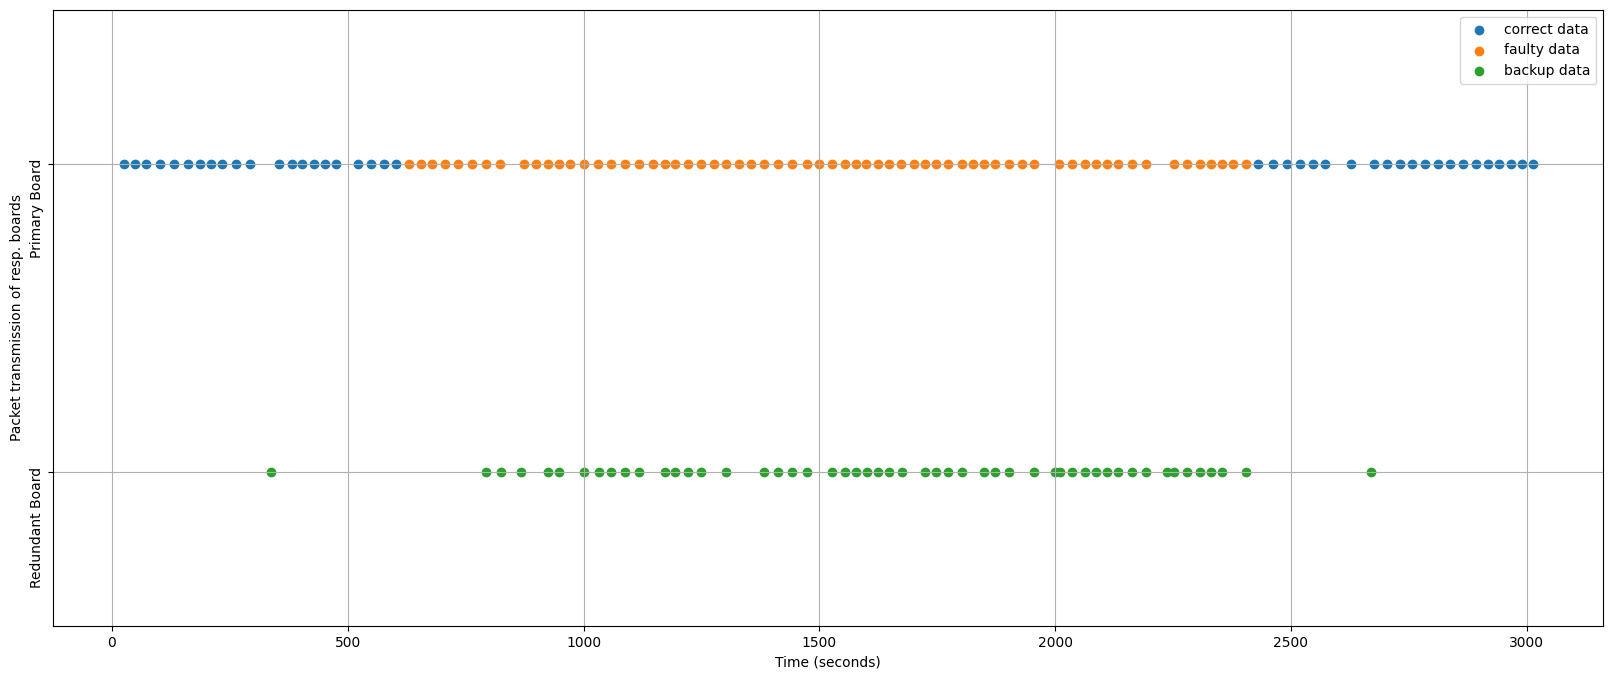

In [136]:
fig = plt.subplots(figsize =(20, 8))

# Set position of bar on X axis
#x_data = np.arange(primary_plotdata[-1][0])

plt.scatter(x_correct_pb, y_correct_pb, label='correct data')
plt.scatter(x_faulty_pb, y_faulty_pb, label='faulty data')
plt.scatter(x_rb, y_rb, label='backup data')
plt.ylim((7,11))
plt.grid(True)
plt.xlabel('Time (seconds)')
plt.ylabel('Packet transmission of resp. boards')
plt.yticks([10,8],['Primary Board', 'Redundant Board'], rotation=90,)
plt.legend()

plt.show()
